In [29]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [31]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

The first characters after COLOR_ indicate the origin color space, and the characters after the 2 are the target color space. This flag represents a conversion from BGR (Blue, Green, Red) to RGB. As you can see, the two color spaces are very similar, with only the first and last channels swapped.


You will need matplotlib.pyplot for viewing the images, and NumPy for some image manipulation

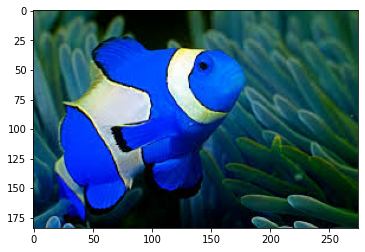

In [32]:

orange_img = cv2.imread("/content/gdrive/MyDrive/nemo0.jpg")

plt.imshow(orange_img)
plt.show()

 You’ll notice that it looks like the blue and red channels have been mixed up. In fact, OpenCV by default reads images in BGR format. You can use the cvtColor(image, flag) and the flag we looked at above to fix this:



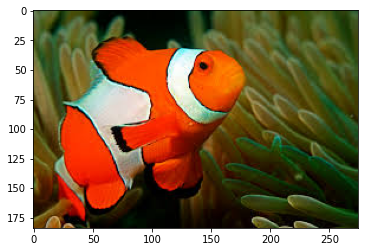

In [33]:

original_image = cv2.cvtColor(orange_img, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
plt.show()

HSV stands for Hue, Saturation, and Value (or brightness), and is a cylindrical color space. The colors, or hues, are modeled as an angular dimension rotating around a central, vertical axis, which represents the value channel. Values go from dark (0 at the bottom) to light at the top. The third axis, saturation, defines the shades of hue from least saturated, at the vertical axis, to most saturated furthest away from the center.

To convert an image from RGB to HSV, you can use cvtColor():


In [34]:

hsv_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2HSV)

**Visualizing Nemo in RGB Color Space**


HSV is a good choice of color space for segmenting by color, but to see why, let’s compare the image in both RGB and HSV color spaces by visualizing the color distribution of its pixels. A 3D plot shows this quite nicely, with each axis representing one of the channels in the color space. 

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

OpenCV split() is very handy here; it splits an image into its component channels

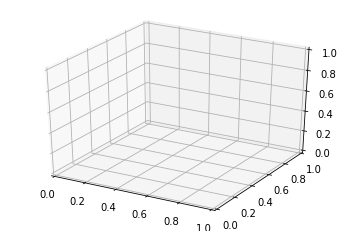

In [39]:
r, g, b = cv2.split(orange_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

Now that you have set up the plot, you need to set up the pixel colors. In order to color each pixel according to its true color, there’s a bit of reshaping and normalization required. It looks messy, but essentially you need the colors corresponding to every pixel in the image to be flattened into a list and normalized, so that they can be passed to the facecolors parameter of Matplotlib scatter().

Normalizing just means condensing the range of colors from 0-255 to 0-1 as required for the facecolors parameter. Lastly, facecolors wants a list, not an NumPy array.

In [40]:
pixel_colors = orange_img.reshape((np.shape(orange_img)[0]*np.shape(orange_img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

Now we have all the components ready for plotting: the pixel positions for each axis and their corresponding colors, in the format facecolors expects. You can build the scatter plot and view it:

In [41]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

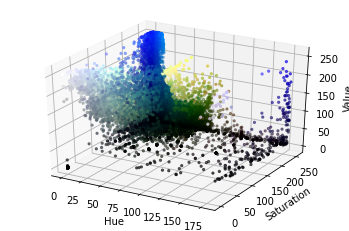

In [42]:
h, s, v = cv2.split(hsv_image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In HSV space, Nemo’s oranges are much more localized and visually separable. The saturation and value of the oranges do vary, but they are mostly located within a small range along the hue axis. This is the key point that can be leveraged for segmentation.

In [35]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)


To impose the mask on top of the original image, you can use cv2.bitwise_and(), which keeps every pixel in the given image if the corresponding value in the mask is 1.

In [36]:

mask = cv2.inRange(hsv_image, light_orange, dark_orange)
result = cv2.bitwise_and(original_image, original_image, mask=mask)

To see what that did exactly, let’s view both the mask and the original image with the mask on top:

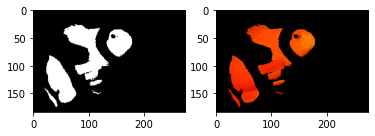

In [37]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()